# COGS 108 - EDA Checkpoint

# Names

- Claire Wu
- Felicity Villagomez
- Duy Pham
- Hy Huynh
- Andrew Vo

<a id='research_question'></a>
# Research Question

Do certain anime genres get different ratings from different age groups? Do Millennials prefer a genre over Gen Z-ers, and vice versa?

# Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_anime_names= pd.read_csv('animes.csv')
df_profiles = pd.read_csv('profiles.csv')
df_reviews = pd.read_csv('reviews.csv')

# Data Cleaning

In [3]:
df_anime_names = df_anime_names[['title','uid','genre']]
df_anime_names

,title,uid,genre
0,Haikyuu!! Second Season,28891,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Shigatsu wa Kimi no Uso,23273,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,Made in Abyss,34599,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,Fullmetal Alchemist: Brotherhood,5114,"['Action', 'Military', 'Adventure', 'Comedy', ..."
4,Kizumonogatari III: Reiketsu-hen,31758,"['Action', 'Mystery', 'Supernatural', 'Vampire']"
...,...,...,...
19306,Flip Flappers,32979,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']"
19307,Fushigi Yuugi,123,"['Adventure', 'Fantasy', 'Magic', 'Martial Art..."
19308,Gakkou no Kaidan,1281,"['Mystery', 'Horror', 'Supernatural']"
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,450,"['Action', 'Adventure', 'Comedy', 'Historical'..."


Each anime came with a string of genres; for example: the anime "Made in Abyss" had the genre string ['Sci-Fi', 'Adventure', 'Mystery', etc]. We split up each part of the string and added that anime into its respective genres using true/false - if that anime contained that genre or not. That way, if the anime had multiple genres, it would count in all its genres. 

In [4]:
df_anime_names = df_anime_names[['title','uid','genre']]
df_anime_names['comedy'] = np.where(df_anime_names['genre'].str.find('Comedy') == -1, False, True)
df_anime_names['action'] = np.where(df_anime_names['genre'].str.find('Action') == -1, False, True)
df_anime_names['sports'] = np.where(df_anime_names['genre'].str.find('Sports') == -1, False, True)
df_anime_names['drama'] = np.where(df_anime_names['genre'].str.find('Drama') == -1, False, True)
df_anime_names['military'] = np.where(df_anime_names['genre'].str.find('Military') == -1, False, True)
df_anime_names['music'] = np.where(df_anime_names['genre'].str.find('Music') == -1, False, True)
df_anime_names['school'] = np.where(df_anime_names['genre'].str.find('School') == -1, False, True)
df_anime_names['shounen'] = np.where(df_anime_names['genre'].str.find('Shounen') == -1, False, True)
df_anime_names['romance'] = np.where(df_anime_names['genre'].str.find('Romance') == -1, False, True)
df_anime_names['sci_fi'] = np.where(df_anime_names['genre'].str.find('Sci-Fi') == -1, False, True)
df_anime_names['adventure'] = np.where(df_anime_names['genre'].str.find('Adventure') == -1, False, True)
df_anime_names['mystery'] = np.where(df_anime_names['genre'].str.find('Mystery') == -1, False, True)
df_anime_names['supernatural'] = np.where(df_anime_names['genre'].str.find('Supernatural') == -1, False, True)
df_anime_names['mecha'] = np.where(df_anime_names['genre'].str.find('Mecha') == -1, False, True)
df_anime_names['historical'] = np.where(df_anime_names['genre'].str.find('Historical') == -1, False, True)
df_anime_names['super_power'] = np.where(df_anime_names['genre'].str.find('Super Power') == -1, False, True)
df_anime_names['fantasy'] = np.where(df_anime_names['genre'].str.find('Fantasy') == -1, False, True)
df_anime_names['slice_of_life'] = np.where(df_anime_names['genre'].str.find('Slice of Life') == -1, False, True)
df_anime_names['shoujo'] = np.where(df_anime_names['genre'].str.find('Shoujo') == -1, False, True)
df_anime_names['horror'] = np.where(df_anime_names['genre'].str.find('Horror') == -1, False, True)
df_anime_names['harem'] = np.where(df_anime_names['genre'].str.find('Harem') == -1, False, True)

df_anime_names = df_anime_names.drop(columns = 'genre')
df_anime_names

,title,uid,comedy,action,sports,drama,military,music,school,shounen,...,mystery,supernatural,mecha,historical,super_power,fantasy,slice_of_life,shoujo,horror,harem
0,Haikyuu!! Second Season,28891,True,False,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Shigatsu wa Kimi no Uso,23273,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Made in Abyss,34599,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,Fullmetal Alchemist: Brotherhood,5114,True,True,False,True,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,Kizumonogatari III: Reiketsu-hen,31758,False,True,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,Flip Flappers,32979,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19307,Fushigi Yuugi,123,True,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
19308,Gakkou no Kaidan,1281,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,450,True,True,False,True,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False


Then, we went through the profile csv and found their birthday year. We used this to sort them into two categories: Millenial (1981-1996) and Gen-Z (1997-2012).

In [5]:
df_profiles = df_profiles[['profile','gender','birthday']]
df_profiles = df_profiles.dropna(how = 'any')
pd.set_option('mode.chained_assignment', None)
df_profiles['birthday'] = pd.to_datetime(df_profiles['birthday'], errors = 'coerce')
df_profiles['birthday'] = pd.DatetimeIndex(pd.to_datetime(df_profiles['birthday'])).year

In [6]:
df_profiles = df_profiles.dropna(how = 'any')
df_profiles = df_profiles.astype({'birthday': 'int32'})
df_profiles = df_profiles.drop(axis = 0, index = 32049)
df_profiles = df_profiles.drop(axis = 0, index = 7).reset_index()
df_profiles = df_profiles.drop(columns = 'index')
df_profiles['Age'] = df_profiles['birthday'].isin(range(1981,1996))
df_profiles['Age'] = df_profiles['Age'].replace(True, 'Millenials')
df_profiles['Age'] = df_profiles['Age'].replace(False, 'Gen_Z')
df_profiles

,profile,gender,birthday,Age
0,DesolatePsyche,Male,1994,Millenials
1,baekbeans,Female,2000,Gen_Z
2,aManOfCulture99,Male,1999,Gen_Z
3,jchang,Male,1992,Millenials
4,angelsreview,Female,1989,Millenials
...,...,...,...,...
37102,HajisSoul,Male,1992,Millenials
37103,samdineen20,Female,1992,Millenials
37104,anjel,Female,1988,Millenials
37105,lovelessxd,Female,1992,Millenials


We also found their profile, anime uid (the specific code that corresponds to the anime), and the score the profile gave that anime

In [7]:
df_reviews = df_reviews[['profile', 'anime_uid', 'score']]
df_reviews[df_reviews['score'] == 11]
df_reviews = df_reviews.replace(11, 10)
df_reviews_dups= df_reviews.drop_duplicates()
df_reviews_dups

,profile,anime_uid,score
0,DesolatePsyche,34096,8
1,baekbeans,34599,10
2,skrn,28891,7
3,edgewalker00,2904,9
4,aManOfCulture99,4181,10
...,...,...,...
182629,iHitokage,2593,10
182631,Onegai,2593,7
182633,Murasa22,2593,10
182636,srry4apologizng,2593,9


In [8]:
df_merge = df_profiles.merge(df_reviews, on= ['profile'], how = 'inner')
df_merge_nodups = df_merge.drop_duplicates()
df_merge_nodups

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
1,DesolatePsyche,Male,1994,Millenials,12403,6
2,DesolatePsyche,Male,1994,Millenials,35073,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
4,DesolatePsyche,Male,1994,Millenials,2035,8
...,...,...,...,...,...,...
243298,Mad_Maestro,Male,1992,Millenials,10033,8
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [9]:
df_comedy = df_anime_names[df_anime_names.comedy == True]
df_comedy = df_comedy[['title', 'uid' ]]
df_comedy
comedy_list = df_comedy['uid'].tolist()
df_reviews_comedy = df_merge_nodups[df_merge_nodups['anime_uid'].isin(comedy_list)]
df_reviews_comedy

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
6,DesolatePsyche,Male,1994,Millenials,30279,7
7,DesolatePsyche,Male,1994,Millenials,77,7
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243291,PinkiPockets,Female,1991,Millenials,34262,8
243292,LCSeixas,Male,1997,Gen_Z,16934,6
243297,lapinmagik,Male,1983,Millenials,10033,8


In [10]:
df_action = df_anime_names[df_anime_names.action == True]
df_action = df_action[['title', 'uid' ]]
df_action
action_list = df_action['uid'].tolist()
df_reviews_action = df_merge_nodups[df_merge_nodups['anime_uid'].isin(action_list)]
df_reviews_action

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
2,DesolatePsyche,Male,1994,Millenials,35073,6
5,DesolatePsyche,Male,1994,Millenials,24921,9
7,DesolatePsyche,Male,1994,Millenials,77,7
9,DesolatePsyche,Male,1994,Millenials,10153,7
...,...,...,...,...,...,...
243298,Mad_Maestro,Male,1992,Millenials,10033,8
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [11]:
df_sports = df_anime_names[df_anime_names.sports == True]
df_sports = df_sports[['title', 'uid' ]]
df_sports
sports_list = df_sports['uid'].tolist()
df_reviews_sports = df_merge_nodups[df_merge_nodups['anime_uid'].isin(sports_list)]
df_reviews_sports

,profile,gender,birthday,Age,anime_uid,score
841,aManOfCulture99,Male,1999,Gen_Z,18617,3
859,jchang,Male,1992,Millenials,5040,9
861,jchang,Male,1992,Millenials,5941,9
1170,angelsreview,Female,1989,Millenials,6392,1
1175,angelsreview,Female,1989,Millenials,1596,2
...,...,...,...,...,...,...
243113,Zengar,Male,1991,Millenials,2283,10
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [12]:
df_drama = df_anime_names[df_anime_names.drama == True]
df_drama = df_drama[['title', 'uid' ]]
df_drama
drama_list = df_drama['uid'].tolist()
df_reviews_drama = df_merge_nodups[df_merge_nodups['anime_uid'].isin(drama_list)]
df_reviews_drama

,profile,gender,birthday,Age,anime_uid,score
4,DesolatePsyche,Male,1994,Millenials,2035,8
7,DesolatePsyche,Male,1994,Millenials,77,7
8,DesolatePsyche,Male,1994,Millenials,31173,9
9,DesolatePsyche,Male,1994,Millenials,10153,7
10,DesolatePsyche,Male,1994,Millenials,31240,9
...,...,...,...,...,...,...
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6
243287,Ultorskoss,Male,1990,Millenials,31,7


In [13]:
df_military = df_anime_names[df_anime_names.military == True]
df_military = df_military[['title', 'uid' ]]
df_military
military_list = df_military['uid'].tolist()
df_reviews_military = df_merge_nodups[df_merge_nodups['anime_uid'].isin(military_list)]
df_reviews_military

,profile,gender,birthday,Age,anime_uid,score
25,DesolatePsyche,Male,1994,Millenials,32615,8
102,DesolatePsyche,Male,1994,Millenials,27631,9
103,DesolatePsyche,Male,1994,Millenials,20709,6
136,DesolatePsyche,Male,1994,Millenials,27829,8
841,aManOfCulture99,Male,1999,Gen_Z,18617,3
...,...,...,...,...,...,...
243246,vincent204,Male,1986,Millenials,31500,4
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [14]:
df_music = df_anime_names[df_anime_names.music  == True]
df_music  = df_music [['title', 'uid' ]]
df_music 
music_list = df_music ['uid'].tolist()
df_reviews_music  = df_merge_nodups[df_merge_nodups['anime_uid'].isin(music_list)]
df_reviews_music

,profile,gender,birthday,Age,anime_uid,score
12,DesolatePsyche,Male,1994,Millenials,877,7
33,DesolatePsyche,Male,1994,Millenials,18245,9
38,DesolatePsyche,Male,1994,Millenials,328,6
94,DesolatePsyche,Male,1994,Millenials,4720,4
996,angelsreview,Female,1989,Millenials,5680,5
...,...,...,...,...,...,...
243158,IngevanSon,Female,1998,Gen_Z,10321,8
243159,teoelena34,Female,1998,Gen_Z,10321,3
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10


In [15]:
df_school = df_anime_names[df_anime_names.school == True]
df_school = df_school[['title', 'uid' ]]
df_school
school_list = df_school['uid'].tolist()
df_reviews_school = df_merge_nodups[df_merge_nodups['anime_uid'].isin(school_list)]
df_reviews_school

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
6,DesolatePsyche,Male,1994,Millenials,30279,7
17,DesolatePsyche,Male,1994,Millenials,32281,9
22,DesolatePsyche,Male,1994,Millenials,31964,7
24,DesolatePsyche,Male,1994,Millenials,30015,9
...,...,...,...,...,...,...
243292,LCSeixas,Male,1997,Gen_Z,16934,6
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [16]:
df_shounen = df_anime_names[df_anime_names.shounen == True]
df_shounen = df_shounen[['title', 'uid' ]]
df_shounen
shounen_list = df_shounen['uid'].tolist()
df_reviews_shounen = df_merge_nodups[df_merge_nodups['anime_uid'].isin(shounen_list)]
df_reviews_shounen

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
11,DesolatePsyche,Male,1994,Millenials,31812,8
13,DesolatePsyche,Male,1994,Millenials,12365,9
16,DesolatePsyche,Male,1994,Millenials,37491,10
20,DesolatePsyche,Male,1994,Millenials,205,8
...,...,...,...,...,...,...
243244,Sevealin,Male,1995,Millenials,6880,9
243245,SpiritGuns,Female,1994,Millenials,6880,9
243291,PinkiPockets,Female,1991,Millenials,34262,8
243297,lapinmagik,Male,1983,Millenials,10033,8


In [17]:
df_romance = df_anime_names[df_anime_names.romance == True]
df_romance = df_romance[['title', 'uid' ]]
df_romance
romance_list = df_romance['uid'].tolist()
df_reviews_romance = df_merge_nodups[df_merge_nodups['anime_uid'].isin(romance_list)]
df_reviews_romance

,profile,gender,birthday,Age,anime_uid,score
4,DesolatePsyche,Male,1994,Millenials,2035,8
8,DesolatePsyche,Male,1994,Millenials,31173,9
12,DesolatePsyche,Male,1994,Millenials,877,7
13,DesolatePsyche,Male,1994,Millenials,12365,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
...,...,...,...,...,...,...
243280,Jaded_Millennial,Male,1994,Millenials,8676,6
243281,Random45,Male,1990,Millenials,8676,8
243282,FoamyFrog,Male,1993,Millenials,165,5
243283,Samurai_Wolf337,Male,1994,Millenials,8676,9


In [18]:
df_sci_fi = df_anime_names[df_anime_names.sci_fi == True]
df_sci_fi = df_sci_fi[['title', 'uid' ]]
df_sci_fi
sci_fi_list = df_sci_fi['uid'].tolist()
df_reviews_sci_fi = df_merge_nodups[df_merge_nodups['anime_uid'].isin(sci_fi_list)]
df_reviews_sci_fi

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
5,DesolatePsyche,Male,1994,Millenials,24921,9
9,DesolatePsyche,Male,1994,Millenials,10153,7
16,DesolatePsyche,Male,1994,Millenials,37491,10
26,DesolatePsyche,Male,1994,Millenials,967,7
...,...,...,...,...,...,...
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6


In [19]:
df_adventure = df_anime_names[df_anime_names.adventure == True]
df_adventure = df_adventure[['title', 'uid' ]]
df_adventure
adventure_list = df_adventure['uid'].tolist()
df_reviews_adventure = df_merge_nodups[df_merge_nodups['anime_uid'].isin(adventure_list)]
df_reviews_adventure

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
15,DesolatePsyche,Male,1994,Millenials,21939,9
20,DesolatePsyche,Male,1994,Millenials,205,8
21,DesolatePsyche,Male,1994,Millenials,32937,8
27,DesolatePsyche,Male,1994,Millenials,34599,8
...,...,...,...,...,...,...
243093,Nekkro,Male,1992,Millenials,4246,8
243094,fura,Male,1989,Millenials,4246,8
243266,HazelOwers,Female,1994,Millenials,1117,9
243297,lapinmagik,Male,1983,Millenials,10033,8


In [20]:
df_mystery = df_anime_names[df_anime_names.mystery == True]
df_mystery = df_mystery[['title', 'uid' ]]
df_mystery
mystery_list = df_mystery['uid'].tolist()
df_reviews_mystery = df_merge_nodups[df_merge_nodups['anime_uid'].isin(mystery_list)]
df_reviews_mystery

,profile,gender,birthday,Age,anime_uid,score
11,DesolatePsyche,Male,1994,Millenials,31812,8
14,DesolatePsyche,Male,1994,Millenials,19,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
27,DesolatePsyche,Male,1994,Millenials,34599,8
28,DesolatePsyche,Male,1994,Millenials,1520,6
...,...,...,...,...,...,...
243282,FoamyFrog,Male,1993,Millenials,165,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [21]:
df_supernatural = df_anime_names[df_anime_names.supernatural == True]
df_supernatural = df_supernatural[['title', 'uid' ]]
df_supernatural
supernatural_list = df_supernatural['uid'].tolist()
df_reviews_supernatural = df_merge_nodups[df_merge_nodups['anime_uid'].isin(supernatural_list)]
df_reviews_supernatural

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
11,DesolatePsyche,Male,1994,Millenials,31812,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
19,DesolatePsyche,Male,1994,Millenials,33674,10
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [22]:
df_mecha = df_anime_names[df_anime_names.mecha == True]
df_mecha = df_mecha[['title', 'uid' ]]
df_mecha
mecha_list = df_mecha['uid'].tolist()
df_reviews_mecha = df_merge_nodups[df_merge_nodups['anime_uid'].isin(mecha_list)]
df_reviews_mecha

,profile,gender,birthday,Age,anime_uid,score
81,DesolatePsyche,Male,1994,Millenials,21177,4
96,DesolatePsyche,Male,1994,Millenials,25731,7
136,DesolatePsyche,Male,1994,Millenials,27829,8
850,jchang,Male,1992,Millenials,2904,10
862,jchang,Male,1992,Millenials,2001,9
...,...,...,...,...,...,...
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6


In [23]:
df_historical = df_anime_names[df_anime_names.historical == True]
df_historical = df_historical[['title', 'uid' ]]
df_historical
historical_list = df_historical['uid'].tolist()
df_reviews_historical = df_merge_nodups[df_merge_nodups['anime_uid'].isin(supernatural_list)]
df_reviews_historical

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
11,DesolatePsyche,Male,1994,Millenials,31812,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
19,DesolatePsyche,Male,1994,Millenials,33674,10
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [24]:
df_super_power = df_anime_names[df_anime_names.super_power == True]
df_super_power = df_super_power[['title', 'uid' ]]
df_super_power
super_power_list = df_super_power['uid'].tolist()
df_reviews_super_power = df_merge_nodups[df_merge_nodups['anime_uid'].isin(super_power_list)]
df_reviews_super_power

,profile,gender,birthday,Age,anime_uid,score
7,DesolatePsyche,Male,1994,Millenials,77,7
22,DesolatePsyche,Male,1994,Millenials,31964,7
41,DesolatePsyche,Male,1994,Millenials,1915,5
63,DesolatePsyche,Male,1994,Millenials,1356,5
73,DesolatePsyche,Male,1994,Millenials,7580,7
...,...,...,...,...,...,...
243051,Kudoku,Male,1993,Millenials,5079,8
243054,TauntingBeat,Male,1994,Millenials,5079,5
243055,sashimee-kenna,Female,1992,Millenials,5079,10
243259,Hakuyou,Male,1991,Millenials,20689,9


In [25]:
df_fantasy = df_anime_names[df_anime_names.fantasy == True]
df_fantasy = df_fantasy [['title', 'uid' ]]
fantasy_list = df_fantasy ['uid'].tolist()
df_reviews_fantasy = df_merge_nodups[df_merge_nodups['anime_uid'].isin(fantasy_list)]
df_reviews_fantasy

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
8,DesolatePsyche,Male,1994,Millenials,31173,9
10,DesolatePsyche,Male,1994,Millenials,31240,9
15,DesolatePsyche,Male,1994,Millenials,21939,9
18,DesolatePsyche,Male,1994,Millenials,33352,10
...,...,...,...,...,...,...
243270,Jimmy2233,Male,1990,Millenials,16009,5
243271,GU357,Male,1993,Millenials,16009,9
243272,ScytheShinigami,Female,1999,Gen_Z,16009,8
243297,lapinmagik,Male,1983,Millenials,10033,8


In [26]:
df_slice = df_anime_names[df_anime_names.slice_of_life == True]
df_slice= df_slice[['title', 'uid' ]]
slice_list = df_slice ['uid'].tolist()
df_reviews_slice = df_merge_nodups[df_merge_nodups['anime_uid'].isin(slice_list)]
df_reviews_slice

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
4,DesolatePsyche,Male,1994,Millenials,2035,8
6,DesolatePsyche,Male,1994,Millenials,30279,7
12,DesolatePsyche,Male,1994,Millenials,877,7
...,...,...,...,...,...,...
243283,Samurai_Wolf337,Male,1994,Millenials,8676,9
243284,Mattios,Male,1996,Gen_Z,35828,10
243285,AishaPachia,Female,1991,Millenials,35828,5
243291,PinkiPockets,Female,1991,Millenials,34262,8


In [27]:
df_shoujo= df_anime_names[df_anime_names.shoujo == True]
df_shoujo= df_shoujo[['title', 'uid' ]]
shoujo_list = df_shoujo ['uid'].tolist()
df_reviews_shoujo = df_merge_nodups[df_merge_nodups['anime_uid'].isin(shoujo_list)]
df_reviews_shoujo

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
6,DesolatePsyche,Male,1994,Millenials,30279,7
8,DesolatePsyche,Male,1994,Millenials,31173,9
12,DesolatePsyche,Male,1994,Millenials,877,7
...,...,...,...,...,...,...
243155,TheRealRedRaven,Female,1999,Gen_Z,10321,8
243156,nekomakenma,Female,2001,Gen_Z,10321,5
243157,Shuru10,Female,1998,Gen_Z,10321,6
243158,IngevanSon,Female,1998,Gen_Z,10321,8


In [28]:
df_horror= df_anime_names[df_anime_names.horror == True]
df_horror= df_horror[['title', 'uid' ]]
horror_list = df_horror ['uid'].tolist()
df_reviews_horror= df_merge_nodups[df_merge_nodups['anime_uid'].isin(horror_list)]
df_reviews_horror

,profile,gender,birthday,Age,anime_uid,score
14,DesolatePsyche,Male,1994,Millenials,19,8
997,angelsreview,Female,1989,Millenials,1571,8
1018,angelsreview,Female,1989,Millenials,47,7
1035,angelsreview,Female,1989,Millenials,7724,8
1050,angelsreview,Female,1989,Millenials,150,6
...,...,...,...,...,...,...
243241,Elmar_Sauro,Male,1998,Gen_Z,6880,10
243242,iceyprototype,Male,1999,Gen_Z,6880,8
243243,Ixillius,Male,1989,Millenials,6880,1
243244,Sevealin,Male,1995,Millenials,6880,9


In [29]:
df_harem= df_anime_names[df_anime_names.harem == True]
df_harem= df_harem[['title', 'uid' ]]
harem_list = df_harem ['uid'].tolist()
df_reviews_harem= df_merge_nodups[df_merge_nodups['anime_uid'].isin(harem_list)]
df_reviews_harem

,profile,gender,birthday,Age,anime_uid,score
64,DesolatePsyche,Male,1994,Millenials,33487,7
65,DesolatePsyche,Male,1994,Millenials,24703,8
69,DesolatePsyche,Male,1994,Millenials,28979,9
94,DesolatePsyche,Male,1994,Millenials,4720,4
101,DesolatePsyche,Male,1994,Millenials,35203,7
...,...,...,...,...,...,...
243155,TheRealRedRaven,Female,1999,Gen_Z,10321,8
243156,nekomakenma,Female,2001,Gen_Z,10321,5
243157,Shuru10,Female,1998,Gen_Z,10321,6
243158,IngevanSon,Female,1998,Gen_Z,10321,8


# Data Analysis & Results (EDA)

We ended up averaging the scores in each genre, for both Gen-Z and Millenials. We printed them, as well as showed two graphs. The first graph shows the proportion of Gen-Z'ers or Millenials that gave a score within that genre, and the second shows the average score of the entire genre.

<AxesSubplot:xlabel='score', ylabel='proportion'>

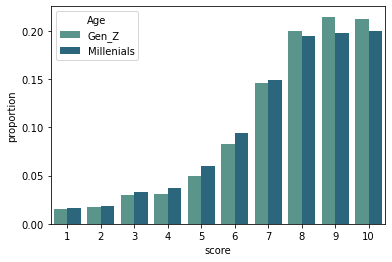

In [30]:
comedy_prop = df_reviews_comedy.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = comedy_prop, palette = "crest" )

,Age,score
0,Gen_Z,7.695085
1,Millenials,7.544193


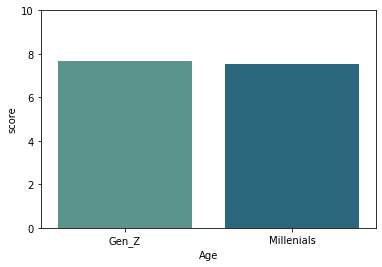

In [31]:
overall_comedy = df_reviews_comedy.groupby('Age', as_index=False)['score'].mean()
overall_comedy_plot = sns.barplot(x = 'Age', y = 'score', data = overall_comedy, palette = "crest")
plt.ylim(0, 10)
overall_comedy

<AxesSubplot:xlabel='score', ylabel='proportion'>

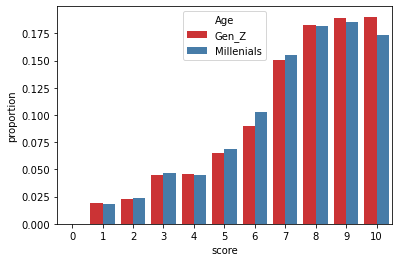

In [32]:
action_prop = df_reviews_action.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = action_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.370713
1,Millenials,7.284483


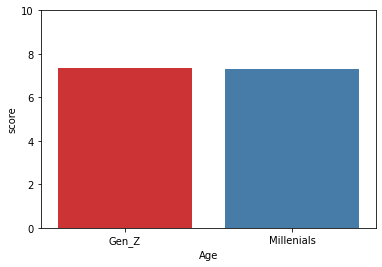

In [33]:
overall_action = df_reviews_action.groupby('Age', as_index=False)['score'].mean()
overall_action_plot = sns.barplot(x = 'Age', y = 'score', data = overall_action, palette = "Set1")
plt.ylim(0, 10)
overall_action

<AxesSubplot:xlabel='score', ylabel='proportion'>

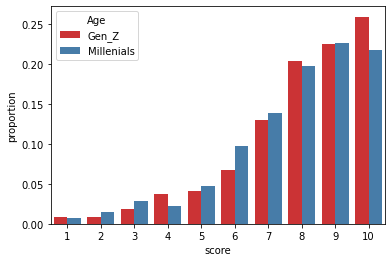

In [34]:
sports_prop = df_reviews_sports.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = sports_prop, palette = "Set1" )

,Age,score
0,Gen_Z,8.012987
1,Millenials,7.804348


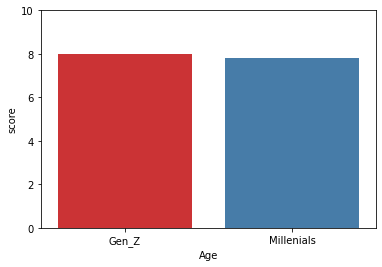

In [35]:
overall_sports = df_reviews_sports.groupby('Age', as_index=False)['score'].mean()
overall_sports_plot = sns.barplot(x = 'Age', y = 'score', data = overall_sports, palette = "Set1")
plt.ylim(0, 10)
overall_sports

<AxesSubplot:xlabel='score', ylabel='proportion'>

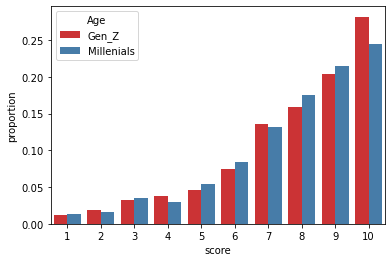

In [36]:
military_prop = df_reviews_military.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = military_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.845609
1,Millenials,7.750107


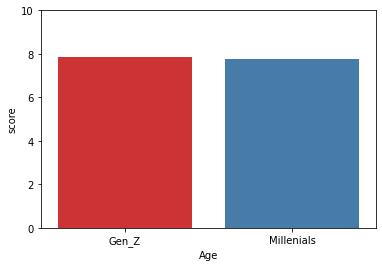

In [37]:
overall_military = df_reviews_military.groupby('Age', as_index=False)['score'].mean()
overall_military_plot = sns.barplot(x = 'Age', y = 'score', data = overall_military, palette = "Set1")
plt.ylim(0, 10)
overall_military

<AxesSubplot:xlabel='score', ylabel='proportion'>

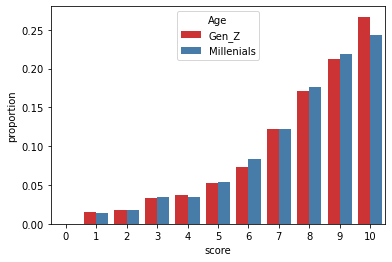

In [38]:
drama_prop = df_reviews_drama.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = drama_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.787674
1,Millenials,7.736092


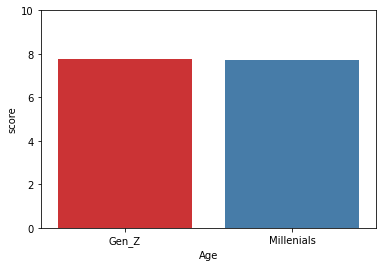

In [39]:
overall_drama = df_reviews_drama.groupby('Age', as_index=False)['score'].mean()
overall_drama_plot = sns.barplot(x = 'Age', y = 'score', data = overall_drama, palette = "Set1")
plt.ylim(0, 10)
overall_drama

<AxesSubplot:xlabel='score', ylabel='proportion'>

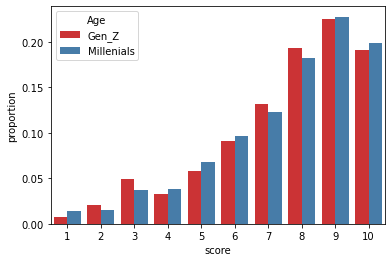

In [40]:
music_prop = df_reviews_music.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = music_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.565359
1,Millenials,7.577594


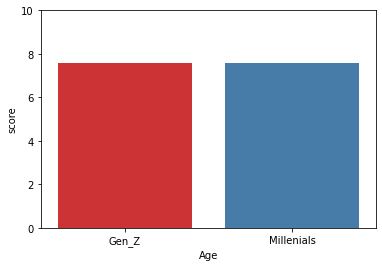

In [41]:
overall_music = df_reviews_music.groupby('Age', as_index=False)['score'].mean()
overall_music_plot = sns.barplot(x = 'Age', y = 'score', data = overall_music, palette = "Set1")
plt.ylim(0, 10)
overall_music

<AxesSubplot:xlabel='score', ylabel='proportion'>

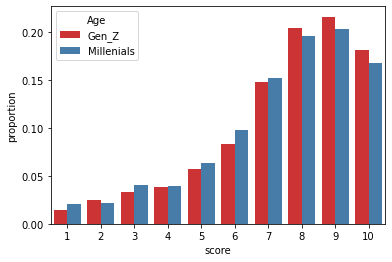

In [42]:
school_prop = df_reviews_school.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = school_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.523183
1,Millenials,7.364632


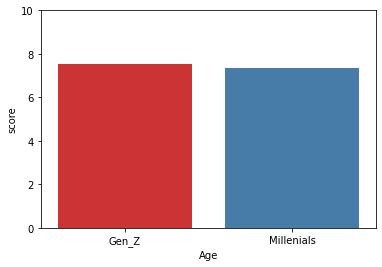

In [43]:
overall_school = df_reviews_school.groupby('Age', as_index=False)['score'].mean()
overall_school_plot = sns.barplot(x = 'Age', y = 'score', data = overall_school, palette = "Set1")
plt.ylim(0, 10)
overall_school

<AxesSubplot:xlabel='score', ylabel='proportion'>

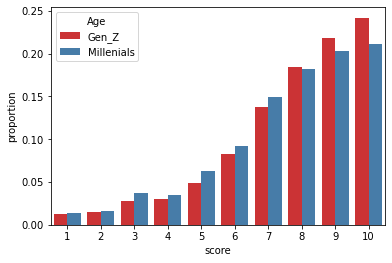

In [44]:
shounen_prop = df_reviews_shounen.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = shounen_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.817575
1,Millenials,7.594521


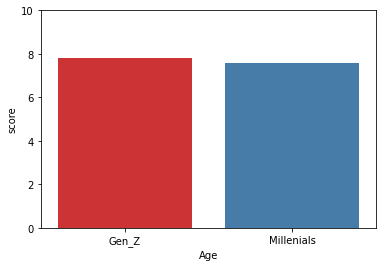

In [45]:
overall_shounen = df_reviews_shounen.groupby('Age', as_index=False)['score'].mean()
overall_shounen_plot = sns.barplot(x = 'Age', y = 'score', data = overall_shounen, palette = "Set1")
plt.ylim(0, 10)
overall_shounen

<AxesSubplot:xlabel='score', ylabel='proportion'>

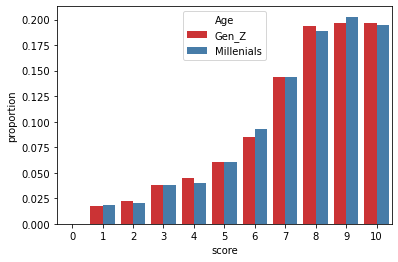

In [46]:
romance_prop = df_reviews_romance.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = romance_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.466918
1,Millenials,7.479257


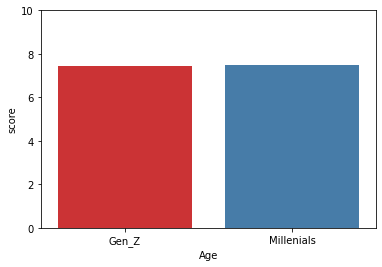

In [47]:
overall_romance = df_reviews_romance.groupby('Age', as_index=False)['score'].mean()
overall_romance_plot = sns.barplot(x = 'Age', y = 'score', data = overall_romance, palette = "Set1")
plt.ylim(0, 10)
overall_romance

<AxesSubplot:xlabel='score', ylabel='proportion'>

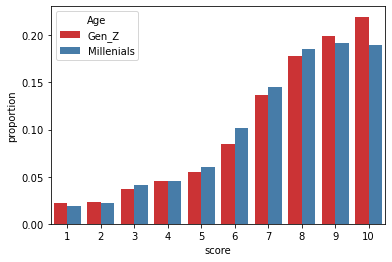

In [48]:
sci_fi_prop = df_reviews_sci_fi.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = sci_fi_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.508536
1,Millenials,7.395005


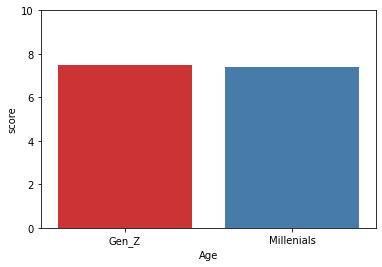

In [49]:
overall_sci_fi = df_reviews_sci_fi.groupby('Age', as_index=False)['score'].mean()
overall_sci_fi_plot = sns.barplot(x = 'Age', y = 'score', data = overall_sci_fi, palette = "Set1")
plt.ylim(0, 10)
overall_sci_fi

<AxesSubplot:xlabel='score', ylabel='proportion'>

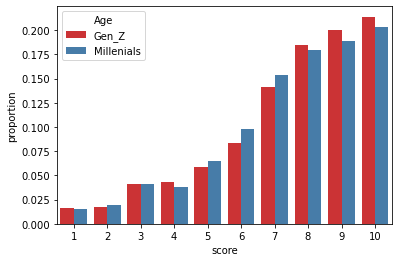

In [50]:
adventure_prop = df_reviews_adventure.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = adventure_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.542912
1,Millenials,7.472025


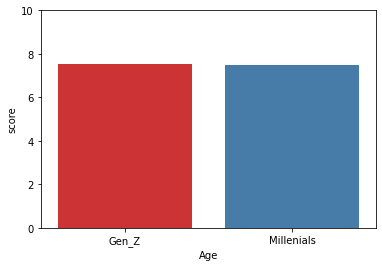

In [51]:
overall_adventure = df_reviews_adventure.groupby('Age', as_index=False)['score'].mean()
overall_adventure_plot = sns.barplot(x = 'Age', y = 'score', data = overall_adventure, palette = "Set1")
plt.ylim(0, 10)
overall_adventure

<AxesSubplot:xlabel='score', ylabel='proportion'>

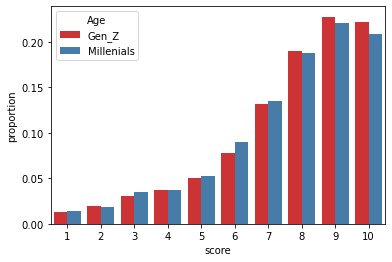

In [52]:
mystery_prop = df_reviews_mystery.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = mystery_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.720485
1,Millenials,7.631811


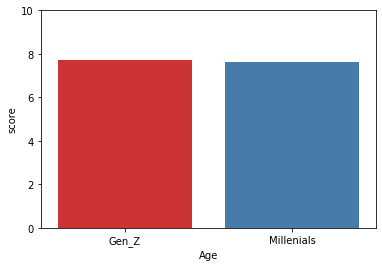

In [53]:
overall_mystery = df_reviews_mystery.groupby('Age', as_index=False)['score'].mean()
overall_mystery_plot = sns.barplot(x = 'Age', y = 'score', data = overall_mystery, palette = "Set1")
plt.ylim(0, 10)
overall_mystery

<AxesSubplot:xlabel='score', ylabel='proportion'>

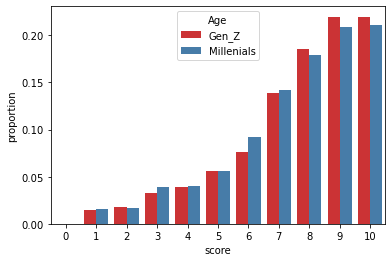

In [54]:
supernatural_prop = df_reviews_supernatural.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = supernatural_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.664955
1,Millenials,7.568932


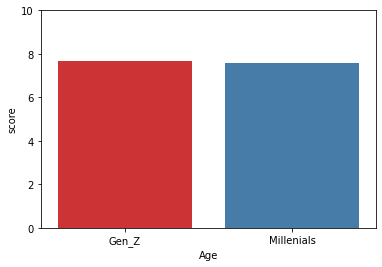

In [55]:
overall_supernatural = df_reviews_supernatural.groupby('Age', as_index=False)['score'].mean()
overall_supernatural_plot = sns.barplot(x = 'Age', y = 'score', data = overall_supernatural, palette = "Set1")
plt.ylim(0, 10)
overall_supernatural

<AxesSubplot:xlabel='score', ylabel='proportion'>

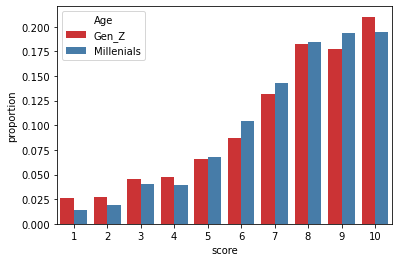

In [56]:
mecha_prop = df_reviews_mecha.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = mecha_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.332608
1,Millenials,7.462341


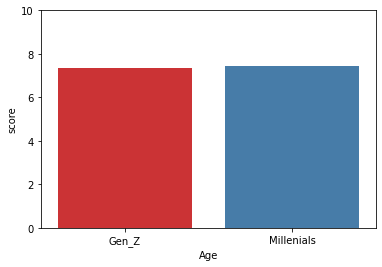

In [57]:
overall_mecha = df_reviews_mecha.groupby('Age', as_index=False)['score'].mean()
overall_mecha_plot = sns.barplot(x = 'Age', y = 'score', data = overall_mecha, palette = "Set1")
plt.ylim(0, 10)
overall_mecha

<AxesSubplot:xlabel='score', ylabel='proportion'>

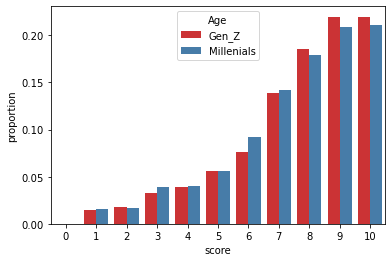

In [58]:
historical_prop = df_reviews_historical.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = historical_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.664955
1,Millenials,7.568932


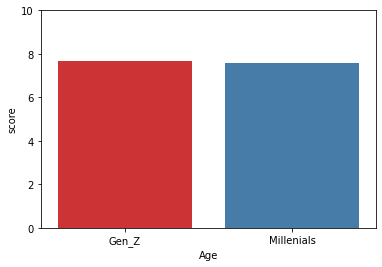

In [59]:
overall_historical = df_reviews_historical.groupby('Age', as_index=False)['score'].mean()
overall_historical_plot = sns.barplot(x = 'Age', y = 'score', data = overall_historical, palette = "Set1")
plt.ylim(0, 10)
overall_historical

<AxesSubplot:xlabel='score', ylabel='proportion'>

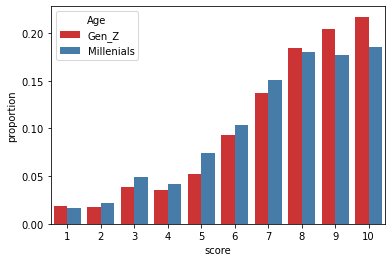

In [60]:
super_power_prop = df_reviews_super_power.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = super_power_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.587236
1,Millenials,7.310658


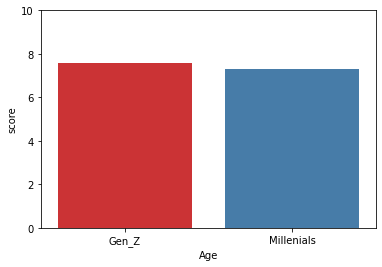

In [61]:
overall_super_power = df_reviews_super_power.groupby('Age', as_index=False)['score'].mean()
overall_super_power_plot = sns.barplot(x = 'Age', y = 'score', data = overall_super_power, palette = "Set1")
plt.ylim(0, 10)
overall_super_power

<AxesSubplot:xlabel='score', ylabel='proportion'>

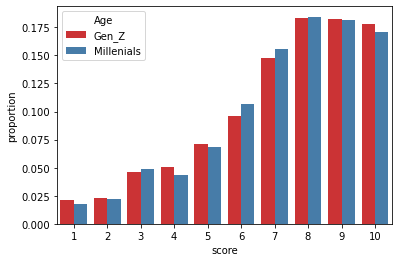

In [62]:
fantasy_prop = df_reviews_fantasy.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = fantasy_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.265102
1,Millenials,7.272283


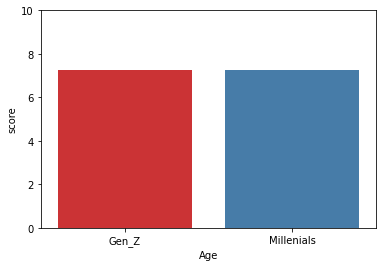

In [63]:
overall_fantasy = df_reviews_fantasy.groupby('Age', as_index=False)['score'].mean()
overall_fantasy_plot = sns.barplot(x = 'Age', y = 'score', data = overall_fantasy, palette = "Set1")
plt.ylim(0, 10)
overall_fantasy

<AxesSubplot:xlabel='score', ylabel='proportion'>

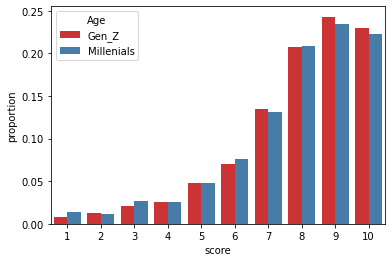

In [64]:
slice_of_life_prop = df_reviews_slice.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = slice_of_life_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.942211
1,Millenials,7.853445


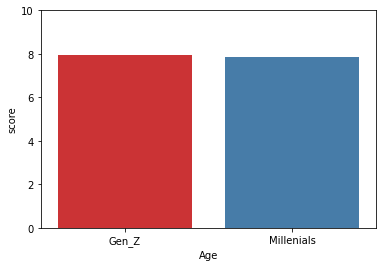

In [65]:
overall_slice_of_life = df_reviews_slice.groupby('Age', as_index=False)['score'].mean()
overall_slice_of_life_plot = sns.barplot(x = 'Age', y = 'score', data = overall_slice_of_life, palette = "Set1") 
plt.ylim(0, 10)
overall_slice_of_life

<AxesSubplot:xlabel='score', ylabel='proportion'>

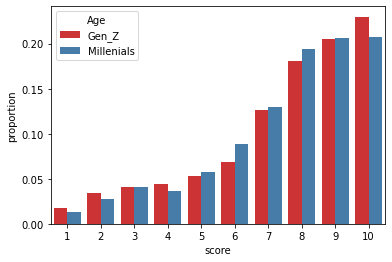

In [66]:
shoujo_prop = df_reviews_shoujo.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = shoujo_prop, palette = "Set1" )

,Age,score
0,Gen_Z,7.533662
1,Millenials,7.540115


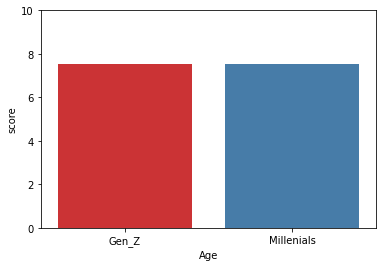

In [67]:
overall_shoujo = df_reviews_shoujo.groupby('Age', as_index=False)['score'].mean()
overall_shoujo_plot = sns.barplot(x = 'Age', y = 'score', data = overall_shoujo, palette = "Set1")
plt.ylim(0, 10)
overall_shoujo

<AxesSubplot:xlabel='score', ylabel='proportion'>

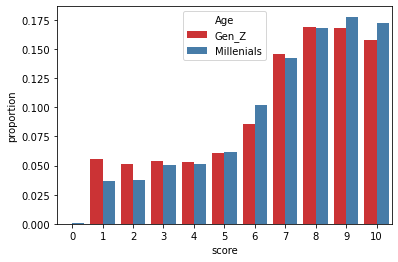

In [68]:
horror_prop = df_reviews_horror.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = horror_prop, palette = "Set1" )

,Age,score
0,Gen_Z,6.806373
1,Millenials,7.046048


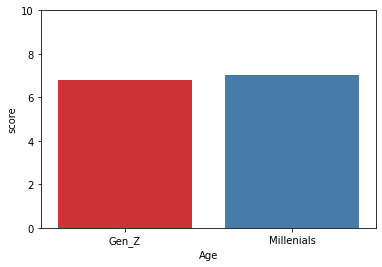

In [69]:
overall_horror = df_reviews_horror.groupby('Age', as_index=False)['score'].mean()
overall_horror_plot = sns.barplot(x = 'Age', y = 'score', data = overall_horror, palette = "Set1")
plt.ylim(0, 10)
overall_horror

<AxesSubplot:xlabel='score', ylabel='proportion'>

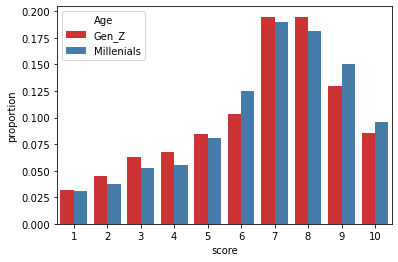

In [70]:

harem_prop = df_reviews_harem.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = harem_prop, palette = "Set1" )

,Age,score
0,Gen_Z,6.566519
1,Millenials,6.735337


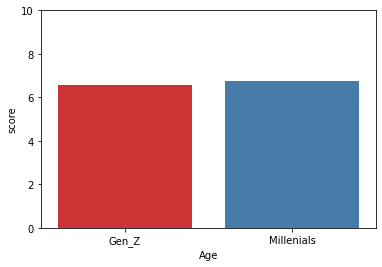

In [71]:
overall_harem = df_reviews_harem.groupby('Age', as_index=False)['score'].mean()
overall_harem_plot = sns.barplot(x = 'Age', y = 'score', data = overall_harem, palette = "Set1")
plt.ylim(0, 10)
overall_harem

In [88]:
overall_df = overall_comedy
overall_df['action'] = overall_action['score']
overall_df['sport'] = overall_sports['score']
overall_df['drama'] = overall_drama['score']
overall_df['military'] = overall_military['score']
overall_df['music'] = overall_music['score']
overall_df['school'] = overall_school['score']
overall_df['shounen'] = overall_shounen['score']
overall_df['romance'] = overall_romance['score']
overall_df['sci_fi'] = overall_sci_fi['score']
overall_df['adventure'] = overall_adventure['score']
overall_df['mystery'] = overall_mystery['score']
overall_df['supernatural'] = overall_supernatural['score']
overall_df['mecha'] = overall_mecha['score']
overall_df['historical'] = overall_historical['score']
overall_df['super_power'] = overall_super_power['score']
overall_df['fantasy'] = overall_fantasy['score']
overall_df['slice_of_life'] = overall_slice_of_life['score']
overall_df['shoujo'] = overall_shoujo['score']
overall_df['horror'] = overall_horror['score']
overall_df['harem'] = overall_harem['score']
overall_df = overall_df.rename(columns={'score': 'comedy'})

overall_df

,Age,comedy,action,sport,drama,military,music,school,shounen,romance,...,mystery,supernatural,mecha,historical,super_power,fantasy,slice_of_life,shoujo,horror,harem
0,Gen_Z,7.695085,7.370713,8.012987,7.787674,7.845609,7.565359,7.523183,7.817575,7.466918,...,7.720485,7.664955,7.332608,7.664955,7.587236,7.265102,7.942211,7.533662,6.806373,6.566519
1,Millenials,7.544193,7.284483,7.804348,7.736092,7.750107,7.577594,7.364632,7.594521,7.479257,...,7.631811,7.568932,7.462341,7.568932,7.310658,7.272283,7.853445,7.540115,7.046048,6.735337


<AxesSubplot:xlabel='Age'>

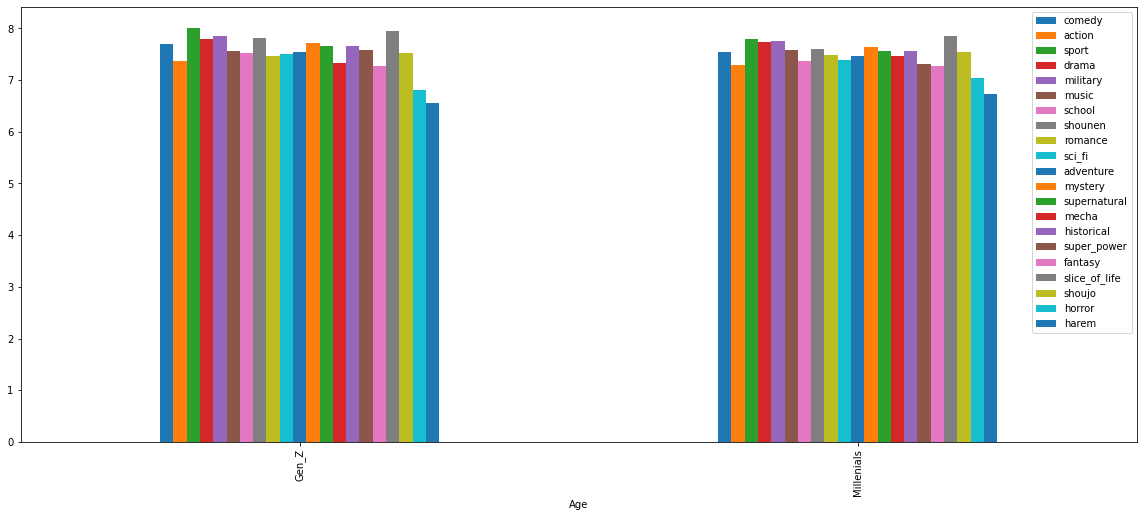

In [121]:
overall_df.plot(x='Age', y=["comedy", "action", 'sport', 'drama','military','music','school','shounen','romance',
                           'sci_fi','adventure','mystery','supernatural','mecha','historical','super_power',
                           'fantasy','slice_of_life','shoujo','horror','harem'], kind="bar", figsize=(20, 8))


Overall, Gen-Z preferred 14/21, while Millenials preferred 7/21. Even though most of their scores were pretty even between the two age groups, there was still a difference. Gen-Z seem to prefer comedy, action, sports, drama, military, shounen, sci-fi, supernatural, slice of life, historical, super power, mystery, adventure, and school. And Millenial seemed to prefer fantasy, mecha, music, romance, shoujo, horror, and harem

We'll add more later :^)